# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [37]:
import numpy as np

### Simulation du lancé de dé

In [38]:
def Roll():
    return int(np.random.choice(range(1,7),1))


In [39]:
Roll()


6

### Compléter le code et commenter

In [40]:
A=0
NA=0
S=10
temp = Roll()
#NA=1
#np.random.seed(10)
while temp != 6:
    NA=NA+1
    temp = Roll()
    print("temp =>",temp," NA =>",NA)
   
A = 1
print(NA)
# on utilise la boucle while pour tester à chaque fois 
#le nombre qu'on avoir aprés le lancement de dé 
while(A<S):
    temp=Roll()
    if((temp+A<S)):
        NA+=1
        A+=temp;
        print("temp =>",temp," NA =>",NA," A =>",A)
    elif temp+A>S:
        NA+=1
        print("temp =>",temp," NA =>",NA," A =>",A)
    else:
        A=S
        NA+=1
        print("temp =>",temp," NA =>",NA," A =>",A)



temp => 3  NA => 1
temp => 6  NA => 2
2
temp => 4  NA => 3  A => 5
temp => 5  NA => 4  A => 10


In [41]:
#A=0
#NA=0
#S=10
#c=0
#while (A<S) :
#    pass

### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [44]:
def sim(S):
    
    A=0
    NA=1    
    c=Roll()
#np.random.seed(2021)
    while (c<6) :
        NA=NA+1
        c=Roll()
        #print(c)
    A=1
    #print(NA)
    while A!=S :
        c=Roll()
        NA+=1
        if A+c<S:
            A+=c
        elif A+c==S:
            A=S
    return NA
        
    

In [45]:
sim(10)

10

# Simulation de $10^5$  scénario 

In [46]:
Freq=np.fromiter((sim(20) for i in range(10**4)),dtype=int)



In [47]:
ESP=Freq.sum()/10**4
ESP

16.1457

In [48]:
x=list(range(10,20))
x

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [49]:
y=[np.fromiter((sim(u) for i in range(10**4)),dtype=int).sum()/50000 for u in x]

In [50]:
#yy=[ sum(u) /10000 for u in y]

In [51]:
import matplotlib.pyplot as plt

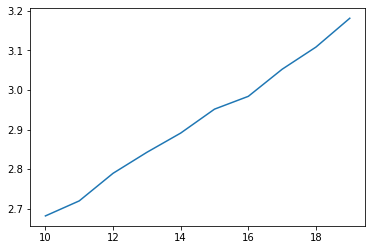

In [52]:
plt.plot(x,y)

In [53]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [54]:
slope

0.05464945454545455

In [55]:
intercept


2.1279469090909093

E(X)= slope * n + intercept

In [56]:
yy=[slope*u+intercept for u in x]

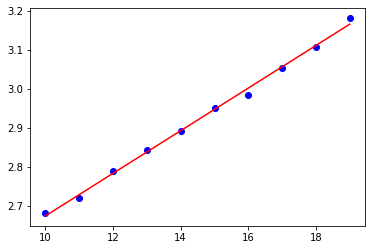

In [59]:
plt.plot(x,y,'ob',x,yy,'r')

<h1>Conclusion </h1>
<hr>
<p> <h3>Simuler le jeux</h3>

Le principe de fonction sim simule le jeux est de déterminer le nombre de coup nécessaire :

On utilise la premiere boucle while  le pion sort de sa prison (A=1) seulement lorsque la valeur du dé est égale a 6

On utilise la deuxieme boucle while  pour tester à chaque fois le nombre qu'on avoir aprés le lancement de dé 
</p>

<p><h3>Simulation de $10^4$  scénario</h3>

la simulation retourne l'esperance du scenario de $10^4$ et donne le nuage de points de la moyenne dans un intervale (10,20)

</p>
